 # EPL Prediction 2018

In [871]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
import seaborn as sns

In [872]:
from glob import glob

#Function to concat all the csv files into one file
def concat(outfile = 'concat-season0119.csv'): #outfile = "name of the output file"
    filenames = glob('./dataset/season*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files))
    concatDF = pd.concat(dataframes, axis=0) #axis=0 to concat vertically 
    concatDF.to_csv('./dataset/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
data = pd.read_csv('./dataset/concat-season0119.csv')
display(data.head())


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


In [873]:
read_team_names = pd.read_csv('./dataset/season-1819.csv')
display(read_team_names.head())

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,10/08/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,6,4,11,8,2,5,2,1,0,0
1,11/08/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,4,1,11,9,7,4,1,1,0,0
2,11/08/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,6,9,9,11,5,5,1,2,0,0
3,11/08/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,1,4,9,8,2,5,2,1,0,0
4,11/08/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,5,11,12,3,5,2,2,0,0


In [874]:
team_name_list = read_team_names['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2018-2019")
display(team_name)



Teams in Season: 2018-2019


['Man United',
 'Bournemouth',
 'Fulham',
 'Huddersfield',
 'Newcastle',
 'Watford',
 'Wolves',
 'Arsenal',
 'Liverpool',
 'Southampton',
 'Cardiff',
 'Chelsea',
 'Everton',
 'Leicester',
 'Tottenham',
 'West Ham',
 'Brighton',
 'Burnley',
 'Man City',
 'Crystal Palace']

In [875]:
#Exporting Team Names in CSV file
teams_data_frame = pd.DataFrame(team_name, columns=["Team Names"])
display(teams_data_frame)
# teams_data_frame.to_csv('./dataset/Teams.csv', index=None)

,Team Names
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


In [876]:
#print
print(teams_data_frame[teams_data_frame['Team Names'] == "Man United"])

   Team Names
0  Man United


In [877]:
#print
print(teams_data_frame[teams_data_frame['Team Names'] == "Brighton"])

   Team Names
16   Brighton


In [878]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 22 columns):
Date        3550 non-null object
HomeTeam    3550 non-null object
AwayTeam    3550 non-null object
FTHG        3550 non-null int64
FTAG        3550 non-null int64
FTR         3550 non-null object
HTHG        3550 non-null int64
HTAG        3550 non-null int64
HTR         3550 non-null object
Referee     3550 non-null object
HS          3550 non-null int64
AS          3550 non-null int64
HST         3550 non-null int64
AST         3550 non-null int64
HF          3550 non-null int64
AF          3550 non-null int64
HC          3550 non-null int64
AC          3550 non-null int64
HY          3550 non-null int64
AY          3550 non-null int64
HR          3550 non-null int64
AR          3550 non-null int64
dtypes: int64(16), object(6)
memory usage: 610.2+ KB


In [879]:
#WIN RATE FOR THE HOME TEAM
n_matches = data.shape[0] #[0] for X-axis
n_features = data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

n_homewins = len(data[data.FTR == 'H'])
win_rate = (float(n_homewins)/(n_matches))*100

print("Total no of matches: {}".format(n_matches))
print("Number of Features: {}".format(n_features))
print("Number of matches won by HOME: {}".format(n_homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 3550
Number of Features: 21
Number of matches won by HOME: 1632
Win rate of HOME team: 45.97183098591549


In [880]:
def getTeamData(teamName):
    print("\n======================= "+ teamName + " =====================\n")
    
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]


In [881]:
getTeamData('Man United')


======================= Man United =====================



'HSPG: 14.07887323943662'

'ASPG: 10.904225352112675'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30985915492957744
Games Draw Percent: 0.2112676056338028


['Man United',
 656,
 2293,
 656,
 577,
 23,
 3931,
 2206,
 4998,
 3871,
 14.07887323943662,
 10.904225352112675,
 1637,
 0.7139119058002616,
 0.8687474989995998,
 1.4007330482590103,
 3.495426829268293]

In [882]:
getTeamData('Chelsea')


======================= Chelsea =====================



'HSPG: 16.098591549295776'

'ASPG: 10.36338028169014'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2140845070422535


['Chelsea',
 690,
 2510,
 690,
 562,
 30,
 3704,
 2270,
 5715,
 3679,
 16.098591549295776,
 10.36338028169014,
 1820,
 0.7250996015936255,
 0.8792650918635171,
 1.379120879120879,
 3.63768115942029]

In [883]:
newStatList = []
for team in team_name:
    team_vector = getTeamData(team) 
    newStatList.append(team_vector)
    
teamStats = pd.DataFrame(newList, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])


======================= Man United =====================



'HSPG: 14.07887323943662'

'ASPG: 10.904225352112675'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30985915492957744
Games Draw Percent: 0.2112676056338028

======================= Bournemouth =====================



'HSPG: 12.118110236220472'

'ASPG: 13.511811023622048'

Games Win Percent: 0.4330708661417323
Games Loose Percent: 0.31496062992125984
Games Draw Percent: 0.25196850393700787

======================= Fulham =====================



'HSPG: 11.51231527093596'

'ASPG: 14.305418719211822'

Games Win Percent: 0.4827586206896552
Games Loose Percent: 0.2561576354679803
Games Draw Percent: 0.26108374384236455

======================= Huddersfield =====================



'HSPG: 9.843137254901961'

'ASPG: 11.882352941176471'

Games Win Percent: 0.4117647058823529
Games Loose Percent: 0.3137254901960784
Games Draw Percent: 0.27450980392156865

======================= Newcastle =====================



'HSPG: 12.157706093189963'

'ASPG: 12.637992831541219'

Games Win Percent: 0.4838709677419355
Games Loose Percent: 0.2903225806451613
Games Draw Percent: 0.22580645161290322

======================= Watford =====================



'HSPG: 11.48031496062992'

'ASPG: 12.472440944881889'

Games Win Percent: 0.49606299212598426
Games Loose Percent: 0.2992125984251969
Games Draw Percent: 0.2047244094488189

======================= Wolves =====================



'HSPG: 10.582677165354331'

'ASPG: 13.803149606299213'

Games Win Percent: 0.41732283464566927
Games Loose Percent: 0.33070866141732286
Games Draw Percent: 0.25196850393700787

======================= Arsenal =====================



'HSPG: 14.971830985915492'

'ASPG: 10.433802816901409'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.29295774647887324
Games Draw Percent: 0.2140845070422535

======================= Liverpool =====================



'HSPG: 15.80281690140845'

'ASPG: 9.794366197183098'

Games Win Percent: 0.4647887323943662
Games Loose Percent: 0.28169014084507044
Games Draw Percent: 0.2535211267605634

======================= Southampton =====================



'HSPG: 13.356846473029046'

'ASPG: 11.269709543568466'

Games Win Percent: 0.4149377593360996
Games Loose Percent: 0.2946058091286307
Games Draw Percent: 0.29045643153526973

======================= Cardiff =====================



'HSPG: 11.098039215686274'

'ASPG: 16.92156862745098'

Games Win Percent: 0.49019607843137253
Games Loose Percent: 0.29411764705882354
Games Draw Percent: 0.21568627450980393

======================= Chelsea =====================



'HSPG: 16.098591549295776'

'ASPG: 10.36338028169014'

Games Win Percent: 0.4788732394366197
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2140845070422535

======================= Everton =====================



'HSPG: 13.014084507042254'

'ASPG: 12.261971830985916'

Games Win Percent: 0.4591549295774648
Games Loose Percent: 0.22535211267605634
Games Draw Percent: 0.3154929577464789

======================= Leicester =====================



'HSPG: 12.103030303030303'

'ASPG: 13.666666666666666'

Games Win Percent: 0.4666666666666667
Games Loose Percent: 0.2787878787878788
Games Draw Percent: 0.2545454545454545

======================= Tottenham =====================



'HSPG: 15.88169014084507'

'ASPG: 10.988732394366197'

Games Win Percent: 0.4535211267605634
Games Loose Percent: 0.3183098591549296
Games Draw Percent: 0.22816901408450704

======================= West Ham =====================



'HSPG: 12.1198738170347'

'ASPG: 14.794952681388013'

Games Win Percent: 0.45110410094637227
Games Loose Percent: 0.26813880126182965
Games Draw Percent: 0.2807570977917981

======================= Brighton =====================



'HSPG: 9.509803921568627'

'ASPG: 15.372549019607844'

Games Win Percent: 0.5294117647058824
Games Loose Percent: 0.1568627450980392
Games Draw Percent: 0.3137254901960784

======================= Burnley =====================



'HSPG: 10.393939393939394'

'ASPG: 16.048484848484847'

Games Win Percent: 0.48484848484848486
Games Loose Percent: 0.2727272727272727
Games Draw Percent: 0.24242424242424243

======================= Man City =====================



'HSPG: 16.064788732394366'

'ASPG: 9.236619718309859'

Games Win Percent: 0.49295774647887325
Games Loose Percent: 0.30704225352112674
Games Draw Percent: 0.2

======================= Crystal Palace =====================



'HSPG: 11.704433497536947'

'ASPG: 13.625615763546797'

Games Win Percent: 0.39901477832512317
Games Loose Percent: 0.3891625615763547
Games Draw Percent: 0.21182266009852216


In [884]:
display(teamStats)

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Man United,656,2293,656,577,23,3931,2206,4998,3871,14.078873,10.904225,1637,0.713912,0.868747,1.400733,3.495427
1,Bournemouth,167,521,167,179,6,1184,709,1539,1716,12.118110,13.511811,354,0.679463,0.891488,1.471751,3.119760
2,Fulham,240,1204,240,279,7,2122,981,2337,2904,11.512315,14.305419,964,0.800664,0.897304,1.248963,5.016667
3,Huddersfield,36,154,36,80,4,536,219,502,606,9.843137,11.882353,118,0.766234,0.928287,1.305085,4.277778
4,Newcastle,334,1431,334,457,29,3088,1385,3392,3526,12.157706,12.637993,1097,0.766597,0.901533,1.304467,4.284431
5,Watford,141,465,141,247,13,1574,588,1458,1584,11.480315,12.472441,324,0.696774,0.903292,1.435185,3.297872
6,Wolves,130,703,130,211,10,1424,726,1344,1753,10.582677,13.803150,573,0.815078,0.903274,1.226876,5.407692
7,Arsenal,684,2495,684,540,31,3592,2248,5315,3704,14.971831,10.433803,1811,0.725852,0.871308,1.377692,3.647661
8,Liverpool,642,2471,642,520,23,3709,2311,5610,3477,15.802817,9.794366,1829,0.740186,0.885561,1.351011,3.848910
9,Southampton,304,1156,304,365,16,2695,1349,3219,2716,13.356846,11.269710,852,0.737024,0.905561,1.356808,3.802632


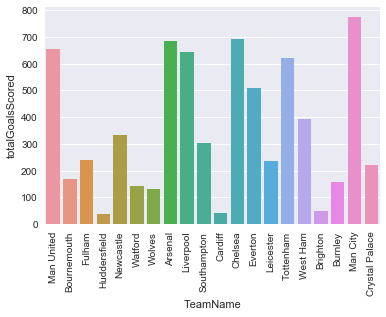

In [885]:
totalGoalsScoredPlot = sns.barplot(teamStats.TeamName, teamStats.totalGoalsScored) 
for item in totalGoalsScoredPlot.get_xticklabels():
    item.set_rotation(90)

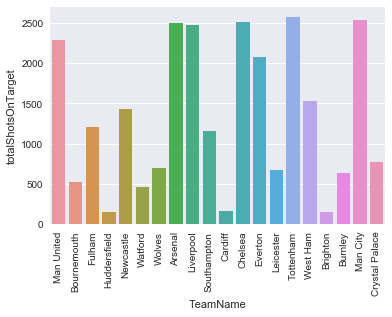

In [886]:
totalShotsOnTargetPlot = sns.barplot(teamStats.TeamName, teamStats.totalShotsOnTarget)
for item in totalShotsOnTargetPlot.get_xticklabels():
    item.set_rotation(90)

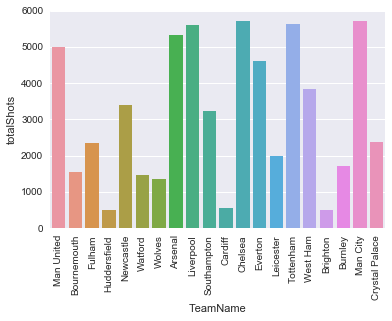

In [887]:
totalShotsPlot = sns.barplot(teamStats.TeamName, teamStats.totalShots) 
for item in totalShotsPlot.get_xticklabels():
    item.set_rotation(90)

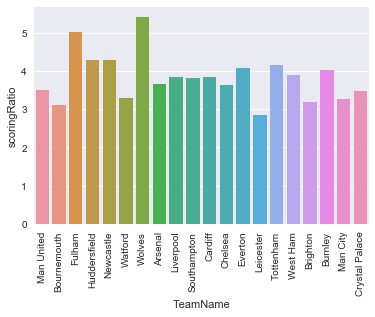

In [888]:
scoringRatioPlot = sns.barplot(teamStats.TeamName, teamStats.scoringRatio) 
for item in scoringRatioPlot.get_xticklabels():
    item.set_rotation(90)

In [889]:
data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [890]:
teamStats.isnull().sum()

TeamName              0
totalGoalsScored      0
totalShotsOnTarget    0
totalGoalsAllowed     0
totalYellowCards      0
totalRedCards         0
totalFouls            0
totalCorners          0
totalShots            0
totalShotsAgainst     0
HSPG                  0
ASPG                  0
goalSaves             0
goalSavesPercent      0
scoringPercent        0
saveRatio             0
scoringRatio          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a59c278>,
      dtype=object)

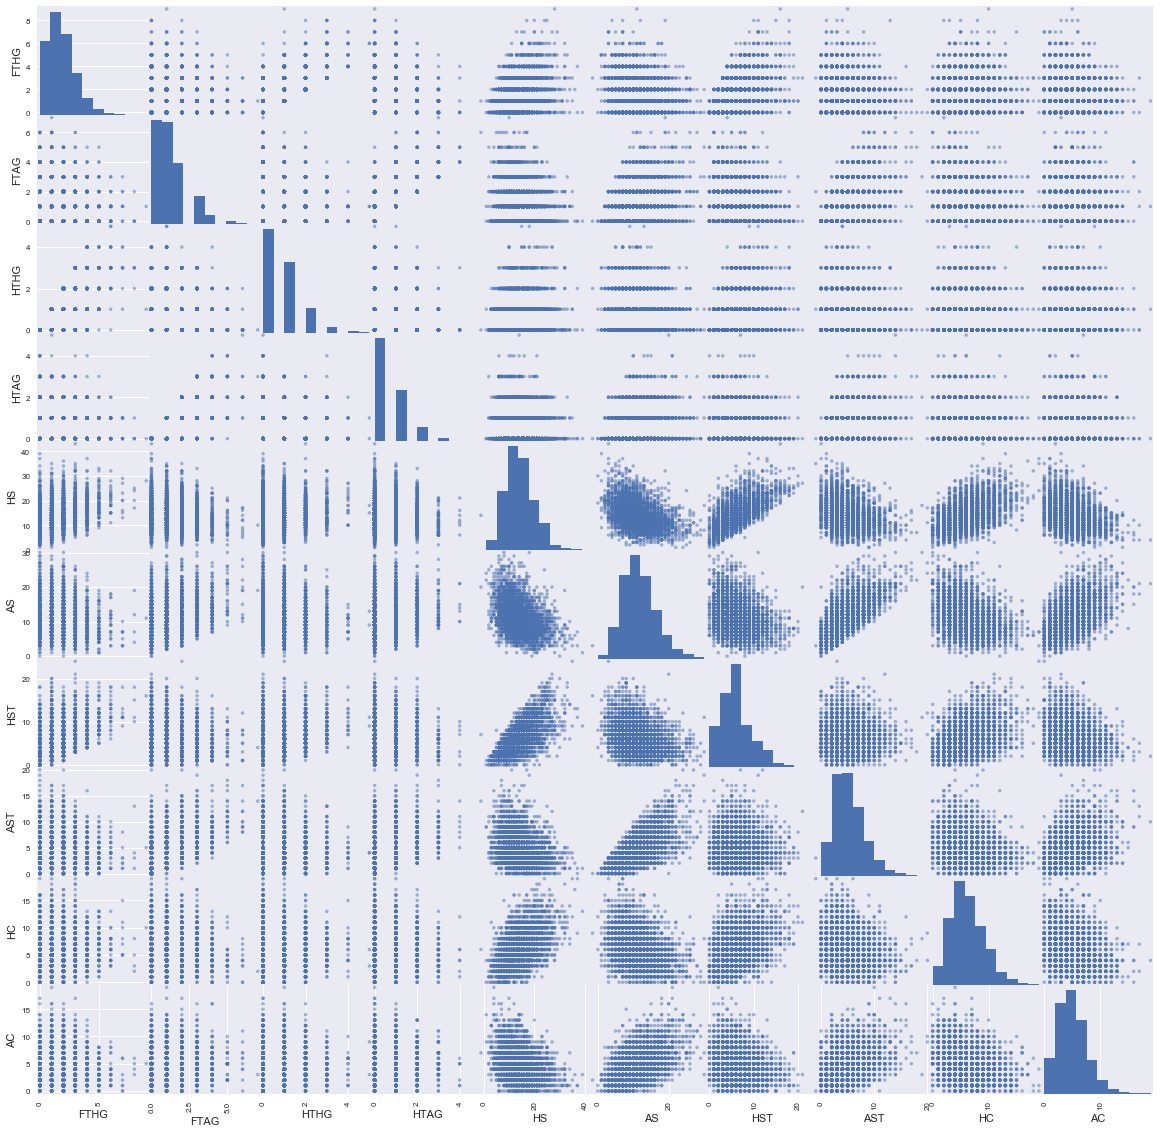

In [891]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC']],figsize=(20,20))

In [892]:
# for team in team_name:
filteredData = data[(data.HomeTeam.isin(team_name))]
data = filteredData[(filteredData.AwayTeam.isin(team_name))]


In [893]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
y_all = data['FTR']
Z_all = X_all.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)

# print(X_all)
# print(y_all)
# print(Z_all)

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [894]:
Z_all.tail()

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3545,Watford,Liverpool,5,10,1,7,12,13,5,5,0,0,0,1
3546,West Ham,Man City,9,9,1,6,6,3,8,1,0,0,0,0
3547,Bournemouth,Arsenal,11,20,5,4,6,9,5,8,2,1,0,0
3548,Wolves,Huddersfield,12,14,3,6,9,8,3,5,1,2,0,0
3549,Burnley,Newcastle,14,17,4,3,6,11,5,5,0,1,0,0


In [895]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(Z):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revisedd columns
        output = output.join(col_data)
    
    return output

In [896]:
Z_all = preprocess_features(Z_all)
print ("Processed feature columns ({} total features):\n{}".format(len(Z_all.columns), list(Z_all.columns)))

Processed feature columns (52 total features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man United', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Tottenham', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


In [897]:

# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(Z_all.head())


Feature values:


,HomeTeam_Arsenal,HomeTeam_Bournemouth,HomeTeam_Brighton,HomeTeam_Burnley,HomeTeam_Cardiff,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Fulham,HomeTeam_Huddersfield,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,0,0,0,0,0,0,0,1,0,0,...,5,9,11,13,4,9,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,11,13,9,5,8,6,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,11,3,14,16,6,5,3,3,0,0
13,0,0,0,1,0,0,0,0,0,0,...,2,9,8,12,1,12,2,1,0,0
19,0,0,0,0,0,0,0,0,0,0,...,11,2,7,11,5,6,0,1,0,0


In [898]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [899]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [900]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = tree.DecisionTreeClassifier()
clf_D = KNeighborsClassifier(n_neighbors = 60)
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
# clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_D, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 1448. . .
Trained model in 0.0295 seconds
Made predictions in 0.0009 seconds.
0.5436752079622397 0.6464088397790055
F1 score and accuracy score for training set: 0.5437 , 0.6464.
Made predictions in 0.0003 seconds.
F1 score and accuracy score for test set: 0.4129 , 0.5400.

Training a SVC using a training set size of 1448. . .
Trained model in 0.1752 seconds
Made predictions in 0.1064 seconds.
0.6780357988598004 0.7375690607734806
F1 score and accuracy score for training set: 0.6780 , 0.7376.
Made predictions in 0.0041 seconds.
F1 score and accuracy score for test set: 0.3524 , 0.4600.

Training a DecisionTreeClassifier using a training set size of 1448. . .
Trained model in 0.0123 seconds
Made predictions in 0.0010 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0006 seconds.
F1 score and accuracy score for test set: 0.4189 , 0.4400.

Training a KNeighborsClassifier using a

In [901]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [902]:
model.predict(X_test)

array(['H', 'D', 'A', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'H', 'H',
       'A', 'H', 'H', 'H', 'A', 'A', 'A', 'A', 'H', 'H', 'A', 'H', 'H',
       'H', 'A', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'A', 'A', 'H', 'A', 'A', 'A', 'H', 'A', 'A', 'H'],
      dtype=object)

In [903]:
predictedProbability = model.predict_proba(X_test)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])

display(predictedProbability)

,Away Team,Draw,Home Team
0,0.056768,0.325549,0.617684
1,0.251454,0.452989,0.295556
2,0.487533,0.243170,0.269297
3,0.385779,0.165578,0.448642
4,0.219468,0.291934,0.488598
5,0.096159,0.254497,0.649345
6,0.448051,0.289506,0.262443
7,0.634756,0.259985,0.105259
8,0.735567,0.172508,0.091925
9,0.089783,0.420459,0.489757


In [904]:
fixtures = pd.read_csv('./dataset/Fixtures/fixtures.csv')
# fixtures = fixtures[pd.isnull(fixtures['Result'])] #drop all the rows having result certain values
fixtures = fixtures.drop(['Round Number','Date','Location','Result'],1)
fixtures.columns = ['HomeTeam','AwayTeam']
fixtures['HS'] = 0
fixtures['AS'] = 0
fixtures['HST'] = 0
fixtures['AST'] = 0
fixtures['HF'] = 0
fixtures['AF'] = 0
fixtures['HC'] = 0
fixtures['AC'] = 0
fixtures['HY'] = 0
fixtures['AY'] = 0
fixtures['HR'] = 0
fixtures['AR'] = 0

In [905]:
display(fixtures)

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man Utd,Leicester,0,0,0,0,0,0,0,0,0,0,0,0
1,Newcastle,Spurs,0,0,0,0,0,0,0,0,0,0,0,0
2,Bournemouth,Cardiff,0,0,0,0,0,0,0,0,0,0,0,0
3,Fulham,Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0
4,Huddersfield,Chelsea,0,0,0,0,0,0,0,0,0,0,0,0
5,Watford,Brighton,0,0,0,0,0,0,0,0,0,0,0,0
6,Wolves,Everton,0,0,0,0,0,0,0,0,0,0,0,0
7,Liverpool,West Ham,0,0,0,0,0,0,0,0,0,0,0,0
8,Southampton,Burnley,0,0,0,0,0,0,0,0,0,0,0,0
9,Arsenal,Man City,0,0,0,0,0,0,0,0,0,0,0,0


In [906]:
preprocessedFixtures = preprocess_features(fixtures)

In [907]:
print ("Processed feature columns ({} total features):\n{}".format(len(preprocessedFixtures.columns),
                                                                   list(preprocessedFixtures.columns)))

Processed feature columns (52 total features):
['HomeTeam_Arsenal', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man Utd', 'HomeTeam_Newcastle', 'HomeTeam_Southampton', 'HomeTeam_Spurs', 'HomeTeam_Watford', 'HomeTeam_West Ham', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Bournemouth', 'AwayTeam_Brighton', 'AwayTeam_Burnley', 'AwayTeam_Cardiff', 'AwayTeam_Chelsea', 'AwayTeam_Crystal Palace', 'AwayTeam_Everton', 'AwayTeam_Fulham', 'AwayTeam_Huddersfield', 'AwayTeam_Leicester', 'AwayTeam_Liverpool', 'AwayTeam_Man City', 'AwayTeam_Man Utd', 'AwayTeam_Newcastle', 'AwayTeam_Southampton', 'AwayTeam_Spurs', 'AwayTeam_Watford', 'AwayTeam_West Ham', 'AwayTeam_Wolves', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


In [908]:
model.predict(preprocessedFixtures)

array(['H', 'A', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'A', 'A',
       'A', 'H', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'H', 'H', 'H', 'H',
       'A', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'A',
       'A', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'A', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'H', 'A', 'A', 'H', 'H',
       'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'A', 'H', 'H',
       'A', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H',
       'A', 'A', 'H', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H',
       'H', 'A', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'A', 'A', 'A',
       'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A', 'H', 'A

In [909]:
fixtures['Result Predicted'] = model.predict(preprocessedFixtures)

In [910]:
Result = fixtures.drop(['HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC'],1)
Result

,HomeTeam,AwayTeam,Result Predicted
0,Man Utd,Leicester,H
1,Newcastle,Spurs,A
2,Bournemouth,Cardiff,H
3,Fulham,Crystal Palace,A
4,Huddersfield,Chelsea,A
5,Watford,Brighton,H
6,Wolves,Everton,H
7,Liverpool,West Ham,H
8,Southampton,Burnley,H
9,Arsenal,Man City,H


In [911]:
fixturePredictedProbability = model.predict_proba(preprocessedFixtures) *100
fixturePredictedProbability = pd.DataFrame(fixturePredictedProbability, columns=['Away win %','Draw %','Home win %'])

display(fixturePredictedProbability)

,Away win %,Draw %,Home win %
0,14.990969,8.592330,76.416700
1,51.852037,15.185021,32.962942
2,26.774631,8.623265,64.602105
3,49.512096,12.045140,38.442764
4,57.146239,15.828616,27.025145
5,17.297256,17.067772,65.634972
6,29.844818,30.845578,39.309605
7,17.294332,19.623221,63.082447
8,24.896692,21.236442,53.866866
9,32.912838,16.110208,50.976953


In [912]:
final = pd.concat([Result, fixturePredictedProbability], axis = 1)

In [913]:
final

,HomeTeam,AwayTeam,Result Predicted,Away win %,Draw %,Home win %
0,Man Utd,Leicester,H,14.990969,8.592330,76.416700
1,Newcastle,Spurs,A,51.852037,15.185021,32.962942
2,Bournemouth,Cardiff,H,26.774631,8.623265,64.602105
3,Fulham,Crystal Palace,A,49.512096,12.045140,38.442764
4,Huddersfield,Chelsea,A,57.146239,15.828616,27.025145
5,Watford,Brighton,H,17.297256,17.067772,65.634972
6,Wolves,Everton,H,29.844818,30.845578,39.309605
7,Liverpool,West Ham,H,17.294332,19.623221,63.082447
8,Southampton,Burnley,H,24.896692,21.236442,53.866866
9,Arsenal,Man City,H,32.912838,16.110208,50.976953


In [917]:
final.to_csv('./dataset/Final-Results/final-Predicted-Result.csv', index = None) #index=None for no indexing

In [918]:
readFixtures = pd.read_csv('./dataset/Fixtures/fixtures.csv')
exportToFixtures = final.drop(['HomeTeam','AwayTeam'],1)

PredictedResultWithFixtureData = pd.concat([readFixtures,exportToFixtures], axis = 1)
PredictedResultWithFixtureData.to_csv('./dataset/Final-Results/Predicted_Result_With_Fixture_Data.csv')


display(PredictedResultWithFixtureData)


,Round Number,Date,Location,Home Team,Away Team,Result,Result Predicted,Away win %,Draw %,Home win %
0,1,11/08/2018 00:45,Old Trafford,Man Utd,Leicester,2 - 1,H,14.990969,8.592330,76.416700
1,1,11/08/2018 17:15,St. James' Park,Newcastle,Spurs,1 - 2,A,51.852037,15.185021,32.962942
2,1,11/08/2018 19:45,Vitality Stadium,Bournemouth,Cardiff,2 - 0,H,26.774631,8.623265,64.602105
3,1,11/08/2018 19:45,Craven Cottage,Fulham,Crystal Palace,0 - 2,A,49.512096,12.045140,38.442764
4,1,11/08/2018 19:45,John Smith's Stadium,Huddersfield,Chelsea,0 - 3,A,57.146239,15.828616,27.025145
5,1,11/08/2018 19:45,Vicarage Road,Watford,Brighton,2 - 0,H,17.297256,17.067772,65.634972
6,1,11/08/2018 22:15,Molineux Stadium,Wolves,Everton,2 - 2,H,29.844818,30.845578,39.309605
7,1,12/08/2018 18:15,Anfield,Liverpool,West Ham,4 - 0,H,17.294332,19.623221,63.082447
8,1,12/08/2018 18:15,St. Mary's Stadium,Southampton,Burnley,0 - 0,H,24.896692,21.236442,53.866866
9,1,12/08/2018 20:45,Emirates Stadium,Arsenal,Man City,0 - 2,H,32.912838,16.110208,50.976953
